# 🙉 Monkey-patching

In [ ]:
#| default_exp patch

In [ ]:
# |hide
from nbdev.showdoc import *
import os

In [ ]:
os.environ["DEBUG"]="0"
os.environ["CPU"]="1"

In [ ]:
#| hide
#| export
from typing import Any, Optional as O


from tinygrad.tensor import Tensor
import numpy as np

# import torch
from fastcore.foundation import patch_to
from matplotlib import pyplot as plt, rcParams

from lovely_grad.repr_str import StrProxy


from lovely_grad.repr_rgb import RGBProxy
# from lovely_grad.repr_plt import PlotProxy
from lovely_grad.repr_chans import ChanProxy

ModuleNotFoundError: No module named 'lovely_gard'

In [ ]:
# |export
def monkey_patch(cls=Tensor):
    "Monkey-patch lovely features into `cls`" 

    if not hasattr(cls, '_plain_repr'):
            cls._plain_repr = cls.__repr__
            cls._plain_str = cls.__str__

    @patch_to(cls)
    def __repr__(self: Tensor):
        return str(StrProxy(self))

    # Plain - the old behavior
    @patch_to(cls, as_prop=True)
    def p(self: Tensor):
        return StrProxy(self, plain=True)

    # Verbose - print both stats and plain values
    @patch_to(cls, as_prop=True)
    def v(self: Tensor):
        return StrProxy(self, verbose=True)

    # .deeper and .deeper(...)
    @patch_to(cls, as_prop=True)
    def deeper(self: Tensor):
        return StrProxy(self, depth=1)

    # .rgb and .rgb(...)
    @patch_to(cls, as_prop=True)
    def rgb(t: Tensor):
        return RGBProxy(t)
    
    # .chans and .chans(...)
    @patch_to(cls, as_prop=True)
    def chans(t: Tensor):
        return ChanProxy(t)

    # # .plt and .plt(...)
    # @patch_to(cls, as_prop=True)
    # def plt(t: torch.Tensor):
    #     return PlotProxy(t)

In [ ]:
monkey_patch()

In [ ]:
Tensor.randn(2,2)

Tensor[2, 2] n=2 x∈[-1.148, -0.672] μ=-0.813 σ=0.196 CPU [[-1.148, -0.672], [-0.749, -0.680]] Realized FROMCPU

In [ ]:
np_image = np.load("mysteryman.npy")
image = Tensor(np_image)

In [ ]:
image.v

Tensor[3, 196, 196] n=3 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 CPU Realized FROMCPU

In [ ]:
spicy = np_image.flatten()[:12] #.clone()

spicy[0] *= 10000
spicy[1] /= 10000
spicy[2] = float('inf')
spicy[3] = float('-inf')
spicy[4] = float('nan')

spicy = Tensor(spicy.reshape((2,6)))
spicy

Tensor[2, 6] n=2 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.113e+03 +Inf! -Inf! NaN! CPU Realized FROMCPU

In [ ]:
spicy.v

Tensor[2, 6] n=2 x∈[-3.541e+03, -3.369e-05] μ=-393.776 σ=1.113e+03 +Inf! -Inf! NaN! CPU

In [ ]:
spicy.p

<Tensor buffer<12, dtypes.float> on CPU with grad None>

In [ ]:
image.deeper

Tensor[3, 196, 196] n=3 x∈[-2.118, 2.640] μ=-0.388 σ=1.073 CPU
  Tensor[196, 196] n=2 x∈[-2.118, 2.249] μ=-0.324 σ=1.036 CPU
  Tensor[196, 196] n=2 x∈[-1.966, 2.429] μ=-0.274 σ=0.973 CPU
  Tensor[196, 196] n=2 x∈[-1.804, 2.640] μ=-0.567 σ=1.178 CPU

In [ ]:
image[:3,:3,:5].deeper(depth=2)

Tensor[3, 3, 5] n=3 x∈[-1.316, -0.197] μ=-0.593 σ=0.302 CPU Realized SHRINK
  Tensor[3, 5] n=2 x∈[-0.765, -0.337] μ=-0.492 σ=0.119 CPU
    Tensor[5] x∈[-0.440, -0.337] μ=-0.385 σ=0.037 CPU [-0.354, -0.337, -0.405, -0.440, -0.388]
    Tensor[5] x∈[-0.662, -0.405] μ=-0.512 σ=0.097 CPU [-0.405, -0.423, -0.491, -0.577, -0.662]
    Tensor[5] x∈[-0.765, -0.474] μ=-0.580 σ=0.112 CPU [-0.474, -0.474, -0.542, -0.645, -0.765]
  Tensor[3, 5] n=2 x∈[-0.513, -0.197] μ=-0.321 σ=0.096 CPU
    Tensor[5] x∈[-0.303, -0.197] μ=-0.243 σ=0.049 CPU [-0.197, -0.197, -0.303, -0.303, -0.215]
    Tensor[5] x∈[-0.408, -0.232] μ=-0.327 σ=0.075 CPU [-0.250, -0.232, -0.338, -0.408, -0.408]
    Tensor[5] x∈[-0.513, -0.285] μ=-0.394 σ=0.091 CPU [-0.303, -0.285, -0.390, -0.478, -0.513]
  Tensor[3, 5] n=2 x∈[-1.316, -0.672] μ=-0.964 σ=0.170 CPU
    Tensor[5] x∈[-0.985, -0.672] μ=-0.846 σ=0.110 CPU [-0.672, -0.985, -0.881, -0.776, -0.916]
    Tensor[5] x∈[-1.212, -0.724] μ=-0.989 σ=0.160 CPU [-0.724, -1.072, -0.968, -0.

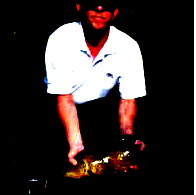

In [ ]:
image.rgb

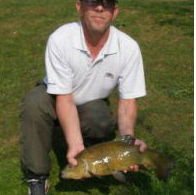

In [ ]:
in_stats = ( (0.485, 0.456, 0.406),     # mean
             (0.229, 0.224, 0.225) )    # std
image.rgb(in_stats)

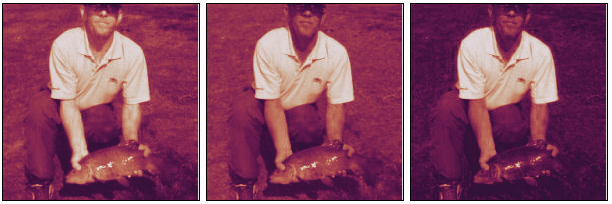

In [ ]:
mean = torch.tensor(in_stats[0])[:,None,None]
std = torch.tensor(in_stats[1])[:,None,None]

(image*std + mean).chans # all pixels in [0, 1] range

In [ ]:
(image*0.3+0.5) # Slightly outside of [0, 1] range

tensor[3, 196, 196] n=115248 x∈[-0.135, 1.292] μ=0.384 σ=0.322

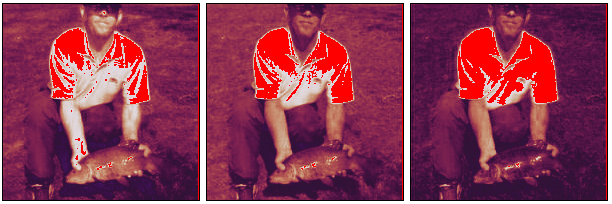

In [ ]:
(image*0.3+0.5).chans # shows clipping (bright blue/red)

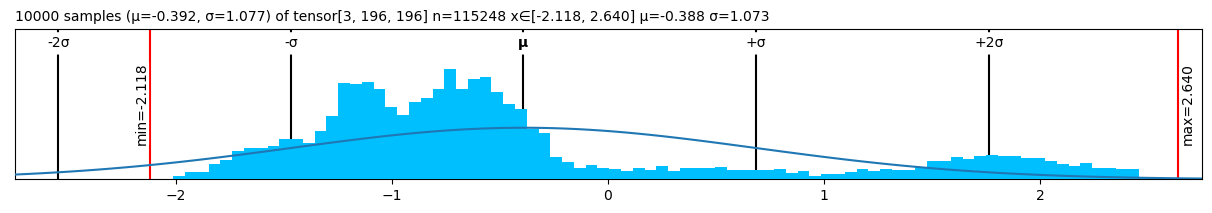

In [ ]:
image.plt

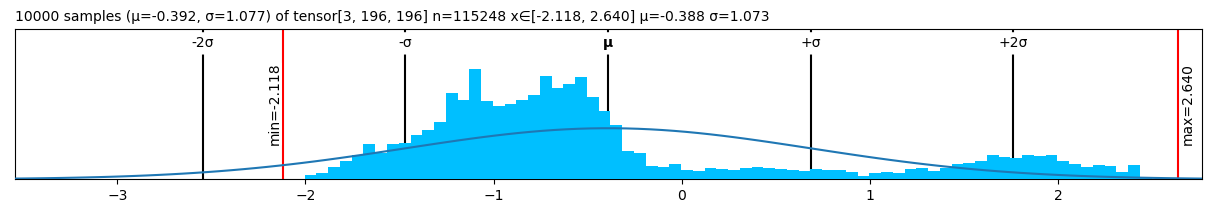

In [ ]:
image.plt(center="mean")

In [ ]:
# |hide

# Deterministic svg output
rcParams["svg.hashsalt"] = "1"

# No date, don't include matplotlib version
kwargs = {'metadata': {"Date": None, "Creator": "Matplotlib, https://matplotlib.org/" }} 
%config InlineBackend.print_figure_kwargs = kwargs

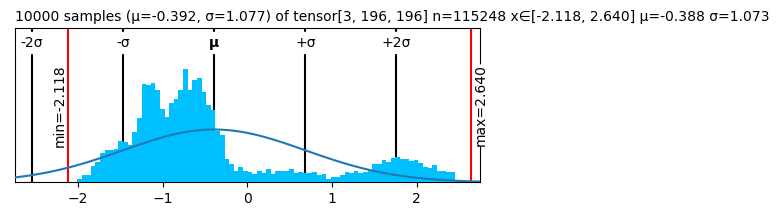

In [ ]:
fig, ax = plt.subplots(figsize=(6, 2))
plt.close(fig)
image.plt(ax=ax)
fig

In [ ]:
# |hide
import nbdev; nbdev.nbdev_export()